In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from PIL import Image


### Load the MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Resize the images to 32x32 using the PIL library

In [4]:
x_train_resized = []
for img in x_train:
    img = Image.fromarray(img)
    img = img.resize((32, 32))
    img = np.array(img)
    x_train_resized.append(img)
x_train_resized = np.array(x_train_resized)

x_test_resized = []
for img in x_test:
    img = Image.fromarray(img)
    img = img.resize((32, 32))
    img = np.array(img)
    x_test_resized.append(img)
x_test_resized = np.array(x_test_resized)

### Reshape the input data to 4D array

In [5]:
x_train_resized = x_train_resized.reshape(x_train_resized.shape[0], 32, 32, 1)
x_test_resized = x_test_resized.reshape(x_test_resized.shape[0], 32, 32, 1)

### Define image size and batch size

In [6]:
img_size = 32
batch_size = 32

### Define data augmentation

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

### Load the pre-trained model (VGG16) for feature extraction

In [8]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

### Freeze the pre-trained model's layers

base_model is a pre-trained model, which is already trained on a large dataset.

In [9]:
for layer in base_model.layers:
    # Freeze the first layer
    layer.trainable = False

### Define the input shape

In [10]:
inputs = Input(shape=(32, 32, 1))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


### Compile the model

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [12]:
history = model.fit(train_datagen.flow(x_train_resized, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train_resized) // batch_size,
                    epochs=10,
                    validation_data=val_datagen.flow(x_test_resized, y_test, batch_size=batch_size),
                    validation_steps=len(x_test_resized) // batch_size)

Epoch 1/10
1875/1875 [==============================] - 87s 46ms/step - loss: 1.0107 - accuracy: 0.6524 - val_loss: 0.3538 - val_accuracy: 0.8899
Epoch 2/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.6230 - accuracy: 0.7939 - val_loss: 0.2600 - val_accuracy: 0.9131
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.5168 - accuracy: 0.8300 - val_loss: 0.1833 - val_accuracy: 0.9403
Epoch 4/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.4485 - accuracy: 0.8545 - val_loss: 0.1588 - val_accuracy: 0.9494
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.4119 - accuracy: 0.8687 - val_loss: 0.1579 - val_accuracy: 0.9464
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.3812 - accuracy: 0.8805 - val_loss: 0.1378 - val_accuracy: 0.9573
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.3587 - accuracy: 0.8863 - val_loss: 0.1340 -

### Evaluate the model on the test data

In [16]:
score = model.evaluate(test_datagen.flow(x_test_resized, y_test, batch_size=batch_size))

313/313 [==============================] - 2s 6ms/step - loss: 0.1440 - accuracy: 0.9574


### Results

In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14402972161769867
Test accuracy: 0.9574000239372253


### Plot the loss and accuracy curves

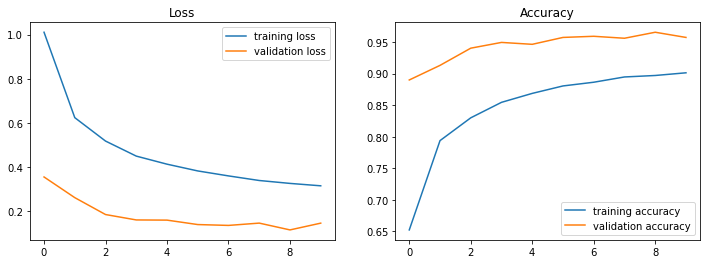

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()